In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('survey_results_public.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

1.) Age distribution of developers: Create a bar chart or distribution plot to visualize the distribution of developer ages in the dataset.

In [24]:
df['YearsCode'].isna().value_counts()

YearsCode
False    71331
True      1937
Name: count, dtype: int64

In [27]:
df2 = df.dropna(subset='YearsCode')

In [28]:
df2['YearsCode'].isna().value_counts()

YearsCode
False    71331
Name: count, dtype: int64

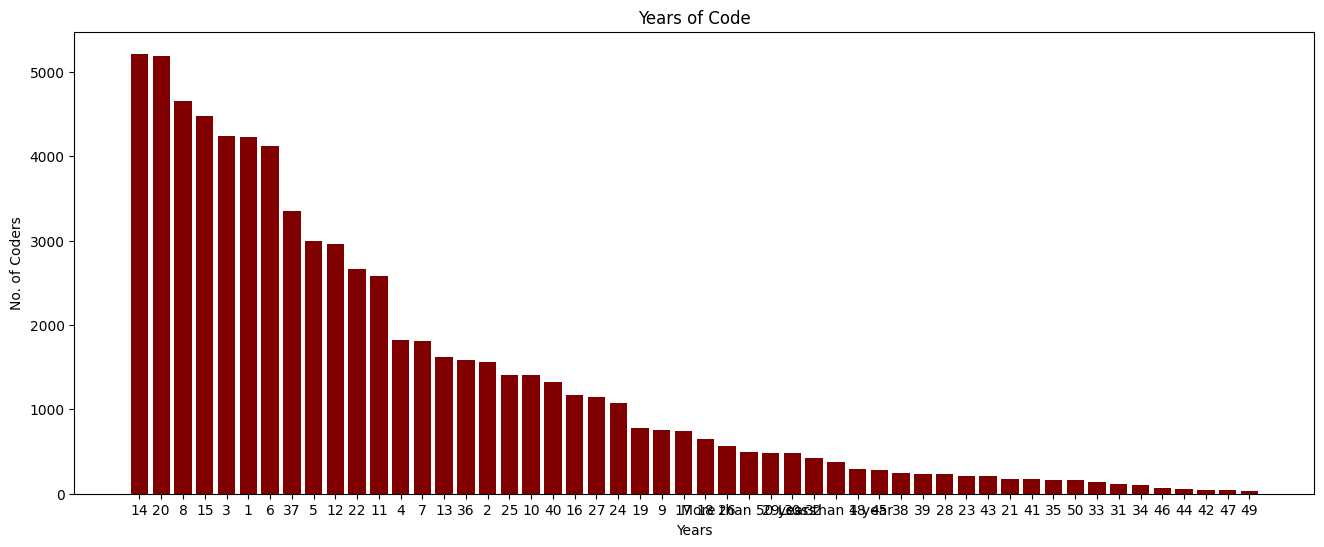

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.bar(df2['YearsCode'].unique(), df2['YearsCode'].value_counts(), color ='maroon')
 
plt.xlabel("Years")
plt.ylabel("No. of Coders")
plt.title("Years of Code")
plt.show()

2.) Gender representation in the developer community: Create a pie chart or bar chart to illustrate the proportion of male, female, and non-binary developers in the dataset.

In [54]:
df2 = df.dropna(subset='Gender')

In [55]:
df2['Gender'].isna().value_counts()

Gender
False    70853
Name: count, dtype: int64

In [60]:
df2['Gender'].value_counts()

Gender
Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-c

In [68]:
df2['Gender'].unique()

array(['Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say',
       'Man;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman', 'Man;Or, in your own words:',
       'Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Or, in your own words:;Woman',
       'Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Non-binary, genderqueer, or gender non-conforming',
       'Man;Or, in your own words:;Woman'], dtype=object)

In [91]:
len(df2[(df2['Gender'] != 'Man') & (df2['Gender'] != 'Woman')])

2847

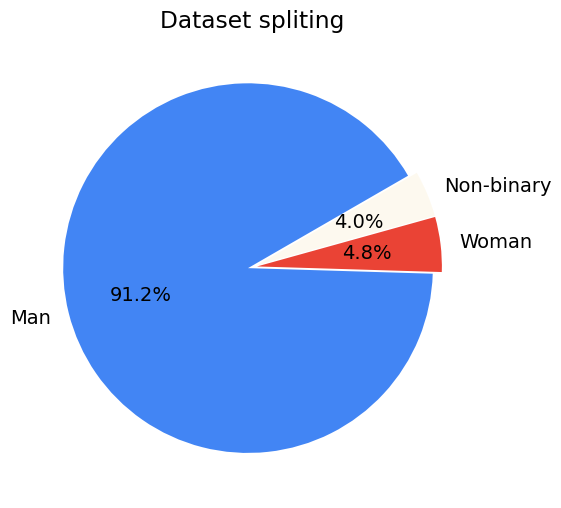

In [95]:
plt.figure(figsize=(14,6))
colors = ['#4285f4', '#ea4335', '#ea11']
plt.rcParams.update({'font.size': 14})
plt.pie([df2['Gender'].value_counts()['Man'],
         df2['Gender'].value_counts()['Woman'],
         len(df2[(df2['Gender'] != 'Man') & (df2['Gender'] != 'Woman')])],
        labels=['Man', 'Woman', 'Non-binary'],
        colors=colors, autopct='%.1f%%', explode=(0.025, 0.025, 0.025),
        startangle=30);
plt.title('Dataset spliting')
plt.show()

3.) Developers by country: Create a choropleth map or bar chart to represent the geographical distribution of developers in different countries.

In [96]:
df['Country']

0                                                      NaN
1                                                   Canada
2        United Kingdom of Great Britain and Northern I...
3                                                   Israel
4                                 United States of America
                               ...                        
73263                                              Nigeria
73264                             United States of America
73265                             United States of America
73266    United Kingdom of Great Britain and Northern I...
73267                                               Canada
Name: Country, Length: 73268, dtype: object

In [99]:
import geopandas